# TODOs for Krishna
- make sure environment works
- make sure paths are appropriate for your datasets

In [2]:
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit import SimDivFilters

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# First collect the data we'll be working with and validation sets

In [3]:
# lets use the 37K+PK data as our training data
df = pd.read_csv('../data/data_prep_for_ml/data_prep_for_ml_pk_37k_screen/TRAIN_03_19_2022.csv')

# we'll hold out a random set from here for testing - 20% test set will be sufficient since it is random and class balanced
# so for testing, use '../out/experiment_to_test_different_negative_datasets_class_balanced/TEST_03_19_2022.csv'

# we'll also test on all the validation molecules we have predicted on since their scaffolds are quite different- easy,med,hard,molport
# so for testing, use '../out/experiment_to_test_different_negative_datasets_class_balanced/cleaned_easy_med_hard_val_sets_800k_10_03_2022.csv'
df

,Name,SMILES,hit
0,BRD-K93123848,Cn1c(nc2cc(ccc12)Oc1ccnc(c1)-c1ncc([nH]1)C(F)(...,1.0
1,BRD-K30309936,C[C@H]1CCCCO[C@H](CN(C)Cc2ccc(cc2)C(F)(F)F)[C@...,1.0
2,TRIMETHADIONE,CN1C(=O)OC(C)(C)C1=O,1.0
3,BRD-K76424103,C[C@]1([C@@H](N(Cc2ccccc2)C(=O)c2ccccc21)c1ccc...,1.0
4,BRD-K65130196,CC(C)(C)NCCCCOc1ccc(cc1C(C)(C)C)Cl,1.0
...,...,...,...
30962,BRD-K24978625,N[C@@H]1CC[C@@H](CCn2cc(nn2)C2CCCCC2)O[C@H]1CO,0.0
30963,BRD-K16976282,C[C@H]1CCCCO[C@H](CN(C)S(=O)(=O)C)[C@@H](C)CN(...,0.0
30964,BRD-K53638538,O[C@@H]1CCCC[C@H]1O,0.0
30965,BRD-K77119472,CO[C@@H]1CN(C)C(=O)c2cc(ccc2OC[C@H](C)N(C[C@@H...,0.0


In [4]:
# Set paths for inputs and outputs
out_dir = '../out/experiment_to_test_different_negative_datasets_class_balanced'
fig_dir = '../figure_panels/negative_dataset_example_class_balanced'
bash_dir = 'experiment_to_test_diff_neg_datasets_train_models_class_balanced.sh'
models_dir = 'models/experiment_with_diff_neg_datasets_class_balanced'

# Let's split into sets where we have different amounts of data with the same ratio of positive:negatives

Positive samples: 1017.0
Negative samples: 29950.0
Negative to positive ratio: 29.449360865290068
Number of negatives to test: [508, 1017, 2034, 4068, 8136, 16272, 29950]
Number of positives to test: [17, 34, 69, 138, 276, 552, 1017]


[10:40:39] Unusual charge on atom 0 number of radical electrons set to zero


Testing with 17 positives and 508 negatives


100%|██████████| 29950/29950 [00:00<00:00, 209324.86it/s]


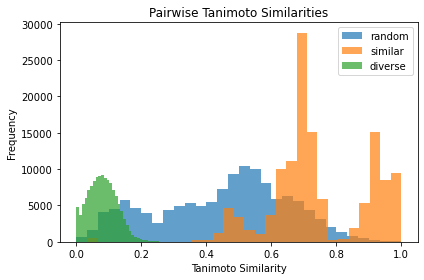

Testing with 34 positives and 1017 negatives


100%|██████████| 29950/29950 [00:00<00:00, 155468.21it/s]


Testing with 69 positives and 2034 negatives


100%|██████████| 29950/29950 [00:00<00:00, 94193.03it/s]


Testing with 138 positives and 4068 negatives


100%|██████████| 29950/29950 [00:00<00:00, 49267.73it/s]


Testing with 276 positives and 8136 negatives


100%|██████████| 29950/29950 [00:01<00:00, 25359.52it/s]


Testing with 552 positives and 16272 negatives


100%|██████████| 29950/29950 [00:02<00:00, 12602.59it/s]


Testing with 1017 positives and 29950 negatives


100%|██████████| 29950/29950 [00:04<00:00, 6764.24it/s]


Testing with 17 positives and 508 negatives


100%|██████████| 29950/29950 [00:00<00:00, 216720.82it/s]


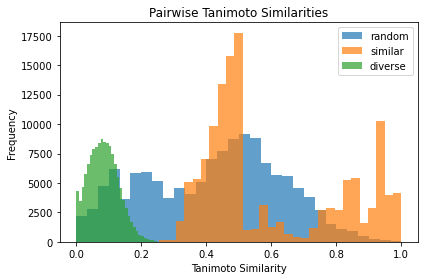

Testing with 34 positives and 1017 negatives


100%|██████████| 29950/29950 [00:00<00:00, 154176.42it/s]


Testing with 69 positives and 2034 negatives


100%|██████████| 29950/29950 [00:00<00:00, 92462.53it/s]


Testing with 138 positives and 4068 negatives


100%|██████████| 29950/29950 [00:00<00:00, 46164.43it/s]


Testing with 276 positives and 8136 negatives


100%|██████████| 29950/29950 [00:01<00:00, 24643.90it/s]


Testing with 552 positives and 16272 negatives


100%|██████████| 29950/29950 [00:02<00:00, 12546.04it/s]


Testing with 1017 positives and 29950 negatives


100%|██████████| 29950/29950 [00:04<00:00, 6847.15it/s]


Testing with 17 positives and 508 negatives


100%|██████████| 29950/29950 [00:00<00:00, 216209.42it/s]


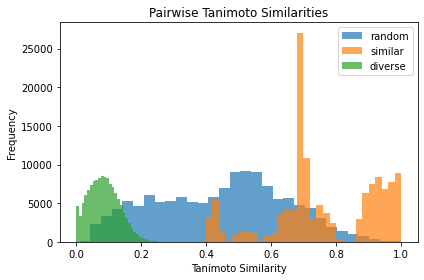

Testing with 34 positives and 1017 negatives


100%|██████████| 29950/29950 [00:00<00:00, 155704.85it/s]


Testing with 69 positives and 2034 negatives


100%|██████████| 29950/29950 [00:00<00:00, 93493.81it/s]


Testing with 138 positives and 4068 negatives


100%|██████████| 29950/29950 [00:00<00:00, 46495.04it/s]


Testing with 276 positives and 8136 negatives


100%|██████████| 29950/29950 [00:01<00:00, 25267.61it/s]


Testing with 552 positives and 16272 negatives


100%|██████████| 29950/29950 [00:02<00:00, 12435.09it/s]


Testing with 1017 positives and 29950 negatives


100%|██████████| 29950/29950 [00:05<00:00, 5882.29it/s]


In [5]:
# Original negative sample sizes
num_neg = [508, 1017, 2034, 4068, 8136, 16272, 29950]

# Calculate the ratio of negative to positive in the original dataframe
total_pos = sum(df['hit'])
total_neg = len(df) - total_pos
neg_to_pos_ratio = total_neg / total_pos

print('Positive samples:', total_pos)
print('Negative samples:', total_neg)
print('Negative to positive ratio:', neg_to_pos_ratio)

# Calculate the corresponding number of positive samples for each dataset size
num_pos = [int(neg / neg_to_pos_ratio) for neg in num_neg]

assert all(abs((neg / pos) - neg_to_pos_ratio) < 0.5 for neg, pos in zip(num_neg, num_pos)), \
    "Positive-to-negative ratio in subsets does not match the original ratio!"

print('Number of negatives to test:', num_neg)
print('Number of positives to test:', num_pos)

# Preprocess positive and negative data
negative_options = df[df['hit'] == 0.0]
positive_options = df[df['hit'] == 1.0]

all_neg_fps = [Chem.RDKFingerprint(Chem.MolFromSmiles(smi)) for smi in list(negative_options['SMILES'])]
all_pos_fps = [Chem.RDKFingerprint(Chem.MolFromSmiles(smi)) for smi in list(positive_options['SMILES'])]

# loop with random seed so we have multiple datasets for each size
num_datasets_per_size = 3  # Specify how many datasets you want per size
for seed in range(num_datasets_per_size):

    # Set random seed for reproducibility
    np.random.seed(seed)
    
    for neg_count, pos_count in zip(num_neg, num_pos):
        print(f'Testing with {pos_count} positives and {neg_count} negatives')

        # First method: random negatives
        rand_neg = negative_options.sample(n=neg_count, replace=False, random_state=seed)
        rand = pd.concat([rand_neg, positive_options.sample(n=pos_count, replace=False, random_state=seed)]).sample(frac=1)
        rand.to_csv(f'{out_dir}/random_seed_{seed}_pos_{pos_count}_neg_{neg_count}.csv', index=False)

        # Second method: most similar negatives
        pos_subset = positive_options.sample(n=pos_count, replace=False, random_state=seed)

        # Select the indices of the positive subset in the original positive dataframe
        pos_subset_indices = positive_options.index.get_indexer(pos_subset.index)
        pos_subset_fps = [all_pos_fps[idx] for idx in pos_subset_indices]

        # Compute Tanimoto similarities using the positive subset fingerprints
        # Process sorted indices for second method of selection (most similar to positive)
        tan_sims_from_all_neg_to_pos = [
            max(DataStructs.BulkTanimotoSimilarity(query_fp, pos_subset_fps)) for query_fp in tqdm.tqdm(all_neg_fps)
        ]
        sorted_indices_most_similar = np.argsort([1.0 - x for x in tan_sims_from_all_neg_to_pos])  # Most similar to least similar

        set_of_sorted_similar_indices = sorted_indices_most_similar[:neg_count]
        similar_neg = negative_options.iloc[set_of_sorted_similar_indices]
        similar = pd.concat([similar_neg, positive_options.sample(n=pos_count, replace=False)]).sample(frac=1)
        similar.to_csv(f'{out_dir}/similar_seed_{seed}_pos_{pos_count}_neg_{neg_count}.csv', index=False)

        # Third method: most diverse negatives
        mmp = SimDivFilters.MaxMinPicker()
        diverse_indices = mmp.LazyBitVectorPick(all_neg_fps, len(all_neg_fps), neg_count, seed=seed)
        diverse_neg = negative_options.iloc[diverse_indices]
        diverse = pd.concat([diverse_neg, positive_options.sample(n=pos_count, replace=False, random_state=seed)]).sample(frac=1)
        diverse.to_csv(f'{out_dir}/diverse_seed_{seed}_pos_{pos_count}_neg_{neg_count}.csv', index=False)

        # Now, let's prove to ourselves that we did this right by plotting one of the small examples
        # Batch similarity calculation for faster computation
        def calculate_pairwise_tanimoto(fps_indices, fps_list):
            """
            Calculate pairwise Tanimoto similarity for given indices of fingerprints.
            """
            # Convert dataframe indices to positional indices for alignment with fps_list
            positional_indices = [negative_options.index.get_loc(idx) for idx in fps_indices]
            selected_fps = [fps_list[idx] for idx in positional_indices]

            similarity_matrix = np.zeros((len(selected_fps), len(selected_fps)))

            for i in range(len(selected_fps)):
                similarity_matrix[i, i:] = DataStructs.BulkTanimotoSimilarity(selected_fps[i], selected_fps[i:])
            
            # Extract upper triangle of the matrix (excluding the diagonal)
            pairwise_similarities = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
            return pairwise_similarities

        if neg_count < 1000: # plot to confirm selection is working as intended
            # For random negatives
            random_tanimoto_scores = calculate_pairwise_tanimoto(rand_neg.index, all_neg_fps)
            plt.hist(random_tanimoto_scores, bins=30, label='random', alpha=0.7)

            # For similar negatives
            similar_tanimoto_scores = calculate_pairwise_tanimoto(negative_options.iloc[set_of_sorted_similar_indices].index, all_neg_fps)
            plt.hist(similar_tanimoto_scores, bins=30, label='similar', alpha=0.7)

            # For diverse negatives
            diverse_tanimoto_scores = calculate_pairwise_tanimoto(negative_options.iloc[diverse_indices].index, all_neg_fps)
            plt.hist(diverse_tanimoto_scores, bins=30, label='diverse', alpha=0.7)

            # Show plot
            plt.legend()
            plt.title("Pairwise Tanimoto Similarities")
            plt.xlabel("Tanimoto Similarity")
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()
        

# Prep script to train models on these different datasets

In [6]:
for seed in range(num_datasets_per_size):
    for neg_count, pos_count in zip(num_neg, num_pos):
        for j in ['random', 'similar', 'diverse']:
            # Skip non-random methods for the largest dataset
            if neg_count == len(df) - num_pos[-1] and j != 'random':
                continue
            
            # Names for folders and paths
            clean_name = f"{j}_seed_{seed}_pos_{pos_count}_neg_{neg_count}"
            models_fold = f'{models_dir}/{clean_name}/'
            curr_data_path = f'{out_dir}/{clean_name}.csv'
            
            mk_folder_command = f'mkdir -p {models_fold}'  # Use -p to avoid errors if the folder exists
            train_command = (
                f'chemprop_train --dropout 0.1 --hidden_size 500 --ffn_num_layers 2 --depth 3 '
                f'--metric prc-auc --extra_metrics auc --save_dir {models_fold} --data_path {curr_data_path} '
                f'--dataset_type classification --features_generator rdkit_2d_normalized --no_features_scaling '
                f'--num_folds 5 --ensemble_size 2 --split_type scaffold_balanced --split_sizes 0.8 0.1 0.1 '
                f'--smiles_columns SMILES --target_columns hit --gpu 0'
            )
            
            # Write the commands to the bash script
            with open(bash_dir, "a") as file1:
                file1.write(mk_folder_command + '; ' + train_command + '\n')

# Then, use script and train the models

# Use different neg dataset models to predict on 20% random test set + external val set

In [ ]:
activate_command = 'conda activate chemprop; '

for seed in range(num_datasets_per_size):
    for neg_count, pos_count in zip(num_neg, num_pos):  # Use num_pos calculated earlier
        for j in ['random', 'similar', 'diverse']:
            for data_name, data in zip(['external_val', '20%_random_test'], 
                                    ['cleaned_easy_med_hard_val_sets_800k_10_03_2022.csv', 
                                        'TEST_03_19_2022.csv']):
                
                # Names for folders and paths
                clean_name = f"{j}_seed_{seed}_pos_{pos_count}_neg_{neg_count}"
                models_fold = f'{models_dir}/{clean_name}/'
                curr_data_path = f'{out_dir}/{clean_name}.csv'
                pred_path = f'{out_dir}/pred_{data_name}_{clean_name}.csv'

                try:
                    # Updated file path to reflect the new naming convention
                    testdf = pd.read_csv(pred_path)
                    continue  # already exists
                except FileNotFoundError:
                    print(clean_name, data)
                    run_command = (
                        f'python predict.py --test_path {out_dir}/{data} '
                        f'--checkpoint_dir {models_fold}/ --preds_path {pred_path} '
                        f'--features_generator rdkit_2d_normalized --no_features_scaling --smiles_column SMILES '
                        f'--ensemble_variance --gpu 0'
                    )
                    full_command = activate_command + run_command
                    test = subprocess.run(full_command, cwd="../../chemprop/", shell=True, capture_output=True)


# Quantify predictions

In [4]:
def modeleval(y_true, y_pred, name = ''):
    
    # Compute auROC 
    auroc = float(roc_auc_score(y_true, y_pred))
    
    # Compute Precision-Recall
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr = float(auc(recall,precision))

    return(auroc, pr)

In [10]:
columns = ['Seed', 'N (negatives)', 'Data Selection', 'Test Set', 'Metric', 'Value']
results = pd.DataFrame(columns=columns)

for seed in range(num_datasets_per_size):
    for neg_count, pos_count in zip(num_neg, num_pos):  # Use num_pos calculated earlier
        for j in ['random', 'similar', 'diverse']:
            for data_name, data in zip(['external_val', '20%_random_test'], 
                                    ['cleaned_easy_med_hard_val_sets_800k_10_03_2022.csv', 
                                        'TEST_03_19_2022.csv']):
                clean_name = f"{j}_seed_{seed}_pos_{pos_count}_neg_{neg_count}"
                
                true_path = f"{out_dir}/{data}"
                pred_path = f"{out_dir}/pred_{data_name}_{clean_name}.csv"
                
                try:
                    true = pd.read_csv(true_path)
                    true = list(true['hit'])

                    test = pd.read_csv(pred_path)
                    test = list(test['hit'])
                except FileNotFoundError:
                    continue

                # Calculate metrics
                roc, pr = modeleval(true, test)
                
                # Prepare rows for results
                row1 = [seed, neg_count, j, data_name, 'auROC', roc]
                row2 = [seed, neg_count, j, data_name, 'auPR', pr]
                new = pd.DataFrame([row1, row2], columns=columns)
                
                # Append results
                results = pd.concat([results, new], ignore_index=True)

In [ ]:
# rename for plotting
results['Test Set'] = ['Restricted Similarity' if x=='external_val' else 'Random (20%)' for x in list(results['Test Set'])]
results

In [ ]:
results = results.reset_index(drop = True)
order = ['random', 'similar', 'diverse']
palette = dict(zip(order, ['grey', 'lightsteelblue', 'royalblue']))
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("whitegrid", {'axes.grid' : False})
g = sns.FacetGrid(results, row = 'Metric', col = 'Test Set', sharey = True, height=4, aspect=1.5, margin_titles=True)
g.map(sns.lineplot, 'N (negatives)', 'Value', 'Data Selection', marker = 'o', dashes=True, hue_order = order, palette = palette)

for ax in g.axes_dict.values():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
g.set(xscale='log')
g.set(xticks=num_neg)
g.set(xticklabels=num_neg)
plt.legend()
plt.tight_layout()
plt.savefig(fig_dir + '.png')
plt.savefig(fig_dir + '.svg')  
plt.show()